# RQ4: What is the most common way of payments?

Now we are going to analyze the means of payment used around New York. First of all we will visualize the rough number of payments, than we will run some statistical analysis on them to obtain some extra informations. All the analysis will be conducted for each borough separately, and than merged thogheter.

We import the python libraries and the costume functions, defined in another file, that we will need for our analysis.

In [1]:
import RQ4_functions
import matplotlib.pyplot

We build a dictonary contaning as keys the name of the boroughs and as values a list of the IDs associated, as seen in the reference file.

In [2]:
boroughs = RQ4_functions.boroughsIdentifyer()

The next function will return a data frame contaning the number of payment methods for each borough (we will consider the borough where the passenger has been picked up). We will immediatly visualize it as a table to have an idea of what is going on.

In [3]:
payments = RQ4_functions.payment_category(boroughs)
payments

,EWR,Queens,Bronx,Manhattan,Staten Island,Brooklyn
Cash,551,1000615,26147,14479421,318,230510
Credit card,3036,2311117,27787,34186603,434,441856
Dispute,47,8936,360,63615,13,1923
No charge,220,37295,1515,226798,50,8789


First of all, let us visualize this data in a more convenient way: we will use an histogram. We will use a logarithmic scale for the y-axis as, as before, the number of taxi in manhattan in hugely more than the rest of the city.

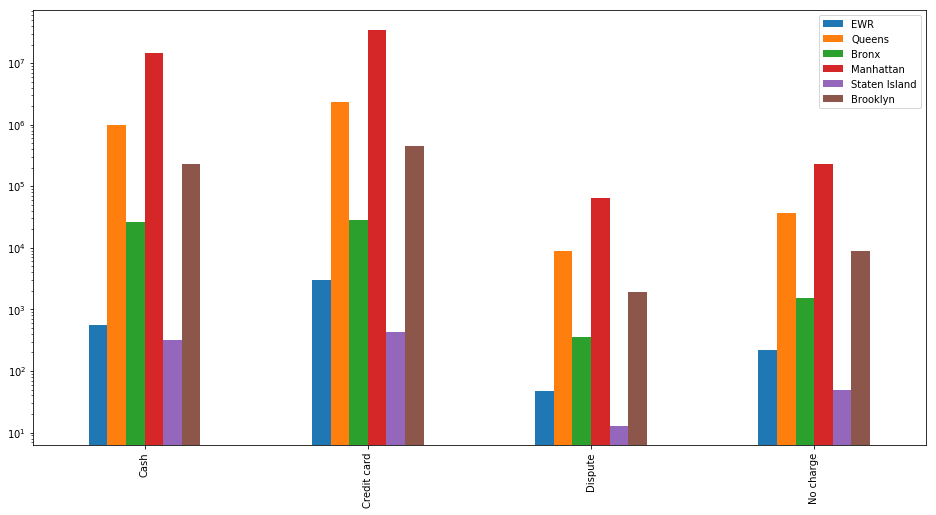

In [4]:
matplotlib.pyplot.show(payments.loc[:,[borough for borough in boroughs.keys()]].iloc[:].plot(kind='bar', logy= True, figsize = (16,8)))

Now it will also be nice to visualize them not by means of payment, but by borough. We will do it in a serie of pie charts this time, as we will be able in this way to better notice some differences.

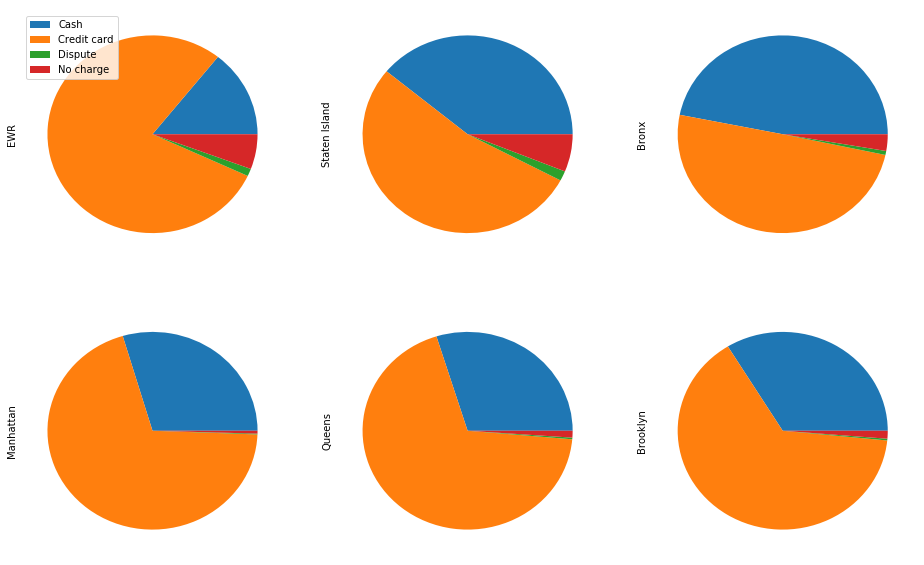

In [5]:
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=3, figsize = (16,10))
c = 0
for borough in boroughs:
    payments.plot(kind = 'pie', y=borough, ax = axes[c % 2, c % 3], labels = None, legend = (c == 0))
    c+=1

As we can see the means of payment differ greatly from borough to borough. For example: people coming from the airport (ERW) mainly use the credit card as people in Manhattan, and people coming from Bronx use both.

It is intuitively clear that there is some sort of correlation between the means of payment and the borough. Now we will conduct a statistical analysis to confirm this intuition. We will run a $\chi^2$ test on our dataframe.

Let us say something on it. Given a I.I.D. $(X_1,\dots,X_k)$ we define $$Q=\sum_{i=1}^kX_i^2\sim\chi_k^2$$ a random variable with a $\chi^2$ distribution: that is, a random variable having as CDF $F_Q(x)$ the regularized gamma function $$F_Q(x)=\frac{\gamma(k/2,x/2)}{\Gamma(k/2)}$$ where $\gamma(\alpha,\beta)=\int_0^\beta t^{\alpha-1}e^{-t}dt$ is the incomplete gamma function and $\Gamma(\alpha)=\int_0^\infty t^{\alpha-1}e^{-t}dt$ the gamma function.

Now given a matrix $O$ of observations we can ask ourself if the row and columns of our matrix are or not indepente. To do that we will define the expected matrix $$E=\left(\frac{(\sum_kM_{i,k})(\sum_kM_{k,j})}{\sum_{a,b}M_{a,b}}\right)_{i,j}$$ That is, the matrix we would have if the values are totally independents. We than define the value $$c=\sum_{i,j}\frac{(E_{i,j}-O_{i,j})^2}{E_{i,j}}$$ Clearly we have that $c=0$ if and only if $O=E$, so $c$ is already a first indication of the independecies of the values, and in particular we can observe that the lower $c$ is the more independents our values are.

Now we will consider how much likely is that our value $c$ is result of a random variable with distribution $\chi^2_k$ where $k=(n-1)(m-1)$ where $m$ and $n$ are the dimensions of our matrices. In particular we wish to know the $p$-value, that is $$p=1-F_Q(c)$$ It represent the probability of $c$ to be smaller than $Q$, therefore a low value of $p$ means dependece, and a big one viceversa independence.

In practice we consider the values dependente if the $p$-value is lesser than $0.05$. In our particular case we defined a function that will compute the $p$-value of a matrix given in the form of a list of lists. We would pass to it our converted data frame.

In [6]:
p = RQ4_functions.chi_2([payments[borough].values.tolist() for borough in boroughs.keys()])
print(p)

0.0


We obtained as $p$-value a $0$ (do to an approximation). That is our confirmation, $p$ is largly lower than $0.05$, meaning that there is a correlation inbetween the payment means and the boroughs.